In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_csv('Resume.csv')

In [3]:
df

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR
...,...,...,...,...
2479,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...","<div class=""fontsize fontface vmargins hmargin...",AVIATION
2481,31605080,GEEK SQUAD AGENT Professional...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2482,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION


In [4]:
df = df[['Resume_str','Category']]
df

,Resume_str,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR
...,...,...
2479,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,AVIATION
2480,"GOVERNMENT RELATIONS, COMMUNICATIONS ...",AVIATION
2481,GEEK SQUAD AGENT Professional...,AVIATION
2482,PROGRAM DIRECTOR / OFFICE MANAGER ...,AVIATION


In [9]:
import re
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  #removing special characters
    text = re.sub(r'\s+', ' ', text)  #removing extra spaces
    return text

In [10]:
df['Resume_str'] = df['Resume_str'].apply(clean_text)
df

C:\Users\HP\AppData\Local\Temp\ipykernel_5912\2324324142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Resume_str'] = df['Resume_str'].apply(clean_text)


,Resume_str,Category
0,hr administratormarketing associate hr admini...,HR
1,hr specialist us hr operations summary versat...,HR
2,hr director summary over 20 years experience ...,HR
3,hr specialist summary dedicated driven and dy...,HR
4,hr manager skill highlights hr skills hr depa...,HR
...,...,...
2479,rank sgte5 non commissioned officer in charge...,AVIATION
2480,government relations communications and organ...,AVIATION
2481,geek squad agent professional profile it supp...,AVIATION
2482,program director office manager summary highl...,AVIATION


In [21]:
!pip install WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

     ---------------------------------------- 0.0/299.8 kB ? eta -:--:--
     -------------------- ----------------- 163.8/299.8 kB 5.0 MB/s eta 0:00:01
     -------------------------------------  297.0/299.8 kB 3.7 MB/s eta 0:00:01
     -------------------------------------  297.0/299.8 kB 3.7 MB/s eta 0:00:01
     -------------------------------------- 299.8/299.8 kB 2.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


C:\Users\HP\AppData\Local\Temp\ipykernel_5912\2443465589.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Category'], order=df['Category'].value_counts().index, palette='viridis')


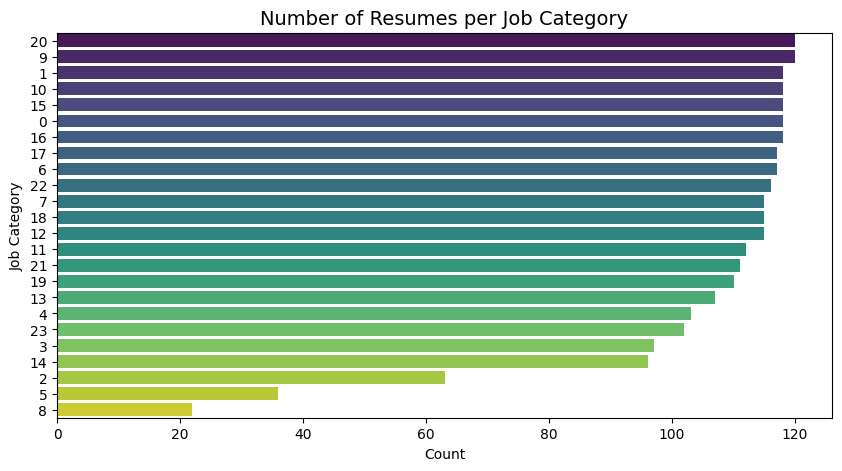

In [22]:
#Visualizing Resume Category Distribution
plt.figure(figsize=(10,5))
sns.countplot(y=df['Category'], order=df['Category'].value_counts().index, palette='viridis')
plt.title("Number of Resumes per Job Category", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Job Category")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_5912\4162836981.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Word_Count"] = df["Resume_str"].apply(lambda x: len(x.split()))


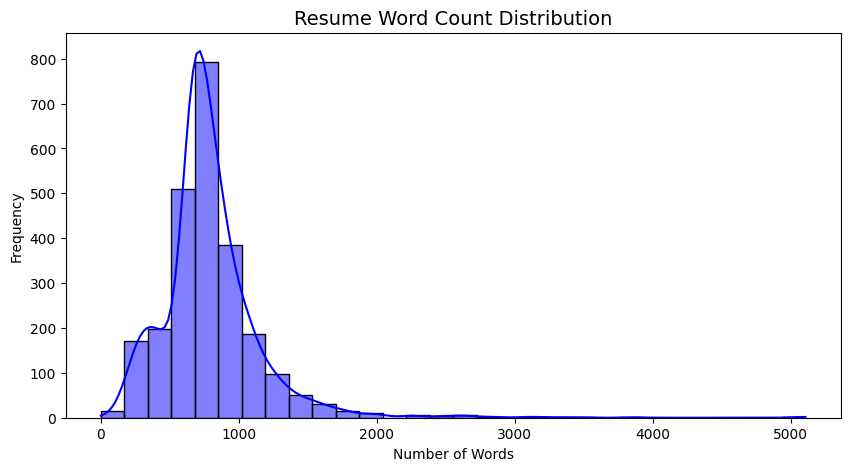

In [23]:
#Word count Distribution in Resumes
df["Word_Count"] = df["Resume_str"].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 5))
sns.histplot(df["Word_Count"], bins=30, kde=True, color='blue')
plt.title("Resume Word Count Distribution", fontsize=14)
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

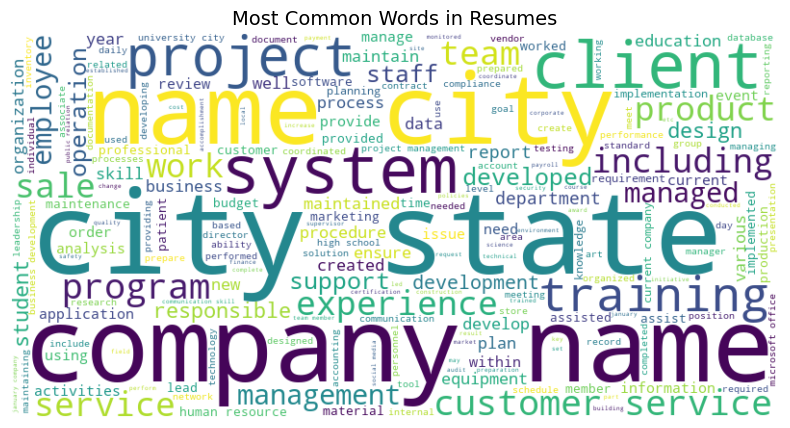

In [24]:
#Most Common Words in Resumes
text = " ".join(df["Resume_str"])

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Resumes", fontsize=14)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_5912\2815718772.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Category"], y=df["Word_Count"], palette="coolwarm")


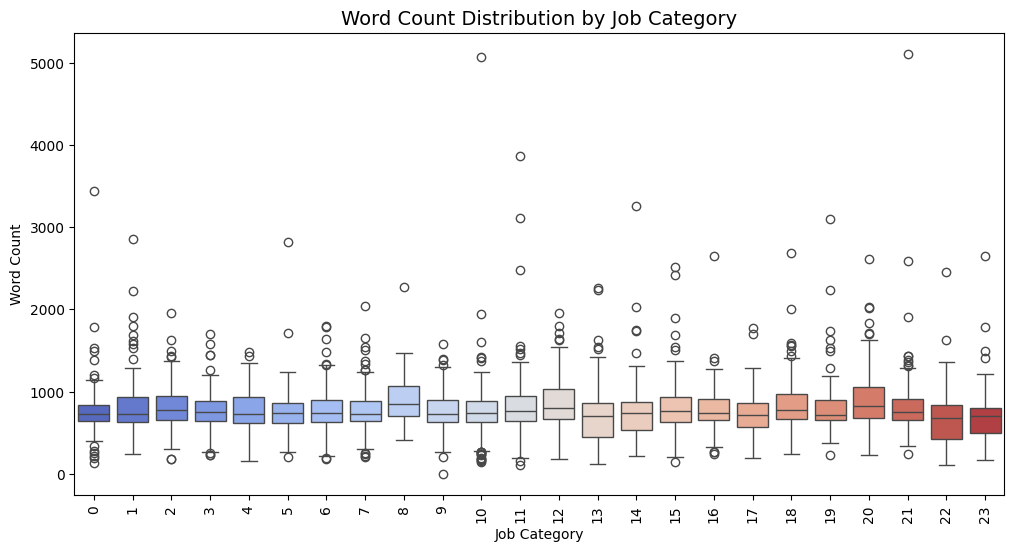

In [25]:
#Compare Word Counts Across Categories
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Category"], y=df["Word_Count"], palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Word Count Distribution by Job Category", fontsize=14)
plt.xlabel("Job Category")
plt.ylabel("Word Count")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_5912\129681059.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="magma")


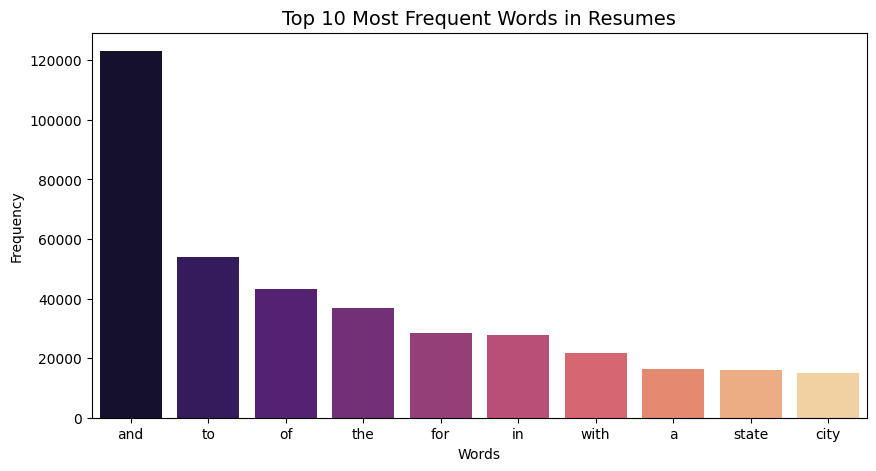

In [26]:
#10 Most Frequent Words in Resumes
from collections import Counter

# Get all words
all_words = " ".join(df["Resume_str"]).split()
word_counts = Counter(all_words)

# Get top 10 words
common_words = word_counts.most_common(10)
words, counts = zip(*common_words)

# Plot bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=list(words), y=list(counts), palette="magma")
plt.title("Top 10 Most Frequent Words in Resumes", fontsize=14)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()


In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])
df

C:\Users\HP\AppData\Local\Temp\ipykernel_5912\1983645846.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category'] = le.fit_transform(df['Category'])


,Resume_str,Category
0,hr administratormarketing associate hr admini...,19
1,hr specialist us hr operations summary versat...,19
2,hr director summary over 20 years experience ...,19
3,hr specialist summary dedicated driven and dy...,19
4,hr manager skill highlights hr skills hr depa...,19
...,...,...
2479,rank sgte5 non commissioned officer in charge...,6
2480,government relations communications and organ...,6
2481,geek squad agent professional profile it supp...,6
2482,program director office manager summary highl...,6


In [12]:
# Split data into training & testing
X_train, X_test, y_train, y_test = train_test_split(df["Resume_str"], df["Category"], test_size=0.2, random_state=42)

In [16]:
# Converting text data into Bert Embeddings
import torch
from transformers import BertTokenizer, BertModel

# Load pre-trained model tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [17]:
def get_bert_embeddings(text):
    input_ids = tokenizer(text, padding=True, truncation=True, return_tensors='pt', max_length=512)
    with torch.no_grad():
        model_output = model(**input_ids)
    return model_output.last_hidden_state[:,0,:].numpy()

In [18]:
X_train_bert = [get_bert_embeddings([text])[0] for text in X_train.tolist()]
X_test_bert = [get_bert_embeddings([text])[0] for text in X_test.tolist()]

In [20]:
X_train_bert = np.array(X_train_bert)
X_test_bert = np.array(X_test_bert)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [32]:
## Deep Learning Model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(512, activation='relu', input_shape=(768,)), # BERT embeddings are 768-dimensional
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(len(le.classes_), activation='softmax')  #softmax for classification
])

# Compile and train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_bert, y_train, validation_data=(X_test_bert, y_test), epochs=50, batch_size=32)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.0630 - loss: 3.1985 - val_accuracy: 0.1891 - val_loss: 2.8355
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.1832 - loss: 2.8078 - val_accuracy: 0.2998 - val_loss: 2.4092
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2667 - loss: 2.4454 - val_accuracy: 0.3682 - val_loss: 2.1594
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.3537 - loss: 2.1897 - val_accuracy: 0.4286 - val_loss: 2.0380
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4139 - loss: 2.0014 - val_accuracy: 0.4467 - val_loss: 1.9898
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4128 - loss: 1.9532 - val_accuracy: 0.3984 - val_loss: 2.0096
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4123 - loss: 1.9349 - val_accuracy: 0.4909 - val_loss: 1.8537
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4702 - loss: 1.8077 - val_accuracy: 0.4849 - v

In [34]:
import pickle

# Save the trained model
model.save("resume_classifier_bert.h5")

# Save label encoder
with open("label_encoder.pkl", "wb") as file:
    pickle.dump(le, file)